In [119]:
from sympy import *
import sympy
from sympy.abc import *

## w生物量方程

t=Symbol('t', positive=True, integer=True)
w=Function('w')
a,b,c=symbols('a b c')
S=Function('S')
k=Symbol('k')
P=Function('P')
W=Function('W')
alpha_star=Symbol(r'\alpha^*')
eg=Symbol(r'\epsilon_g')
w_star=Symbol(r'w^*')

In [179]:
eq1=Eq(diff(w(t), t), a*w(t)*(1-w(t)/b)-c*S(t)*w(t))
eq1

Eq(Derivative(w(t), t), a*(1 - w(t)/b)*w(t) - c*S(t)*w(t))

w是生物量，a b c是待定的系数，S是放牧强度，具体单位请看问题描述。
这是方程1，可解出w和S的关系式子。

In [135]:
ICmax=Function('IC_{max}')
LAI=Function('LAI')
eq5=Eq(
ICmax(t), (0.935)+ LAI(t)*(0.498) - (LAI(t)**2)*(0.00575)
)
eq5

Eq(IC_{max}(t), -0.00575*LAI(t)**2 + 0.498*LAI(t) + 0.935)

ICmax是植被的最大截留量，LAI是植被的叶面积指数，这是方程5，表示ICmax可由LAI求得。

In [159]:
cp=Function('cp')
a1=Symbol('a1') # (1-exp(eg*w(t)/w_star)
a2=Symbol('a2') # (1-exp(-eg*w(t)/w_star)

eq3=Eq(
    cp(t), a2 * 
   (alpha_star - W(t)* a1-1.8*S(t))
)
eq3

Eq(cp(t), a2*(\alpha^* - a1*W(t) - 1.8*S(t)))

cp是植被覆盖率，a1 a2 是两个自定义的量（详见下面），a^*是最大增长率，S是放牧强度，这是方程3。

In [175]:
Eq(a1, (1-exp(eg*w(t)/w_star)))

Eq(a1, 1 - exp(\epsilon_g*w(t)/w^*))

In [177]:
Eq(a2,(1-exp(-eg*w(t)/w_star)))

Eq(a2, 1 - exp(-\epsilon_g*w(t)/w^*))

In [160]:
cp=a2 * \
   (alpha_star - W(t)* a1-1.8*S(t))
cp

a2*(\alpha^* - a1*W(t) - 1.8*S(t))

把cp用方程3代替，消去了cp。

In [162]:
ICstore=Function('ICstore')
a3=Symbol('a3') # (1-exp(-k*P(t)/ICmax(t)))
eq4=Eq(
    ICstore(t), cp *ICmax(t) * a3
)
eq4

Eq(ICstore(t), a2*a3*(\alpha^* - a1*W(t) - 1.8*S(t))*IC_{max}(t))

ICstore是植被截留量（注意不是最大截留量），a3是自定义的变量，这是方程4，用来消去ICstore。

In [178]:
Eq(a3,(1-exp(-k*P(t)/ICmax(t))) )

Eq(a3, 1 - exp(-k*P(t)/IC_{max}(t)))

In [164]:
ICstore=cp *ICmax(t) * a3
ICstore

a2*a3*(\alpha^* - a1*W(t) - 1.8*S(t))*IC_{max}(t)

这是消去了cp和ICstore后的式子，ICmax并不消去，因为它和叶面积指数LAI的关系式比较复杂。

## W土壤湿度方程

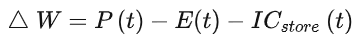
这是原始的方程2，注意，不考虑输入径流量$R_{in}$和输出径流量$R_{out}$，那个G开头的变量也不用考虑。
当t是离散变量时，比如t是月份，那W的增量就写作$\Delta W$，当t是连续变量时，那W的增量就写作$dW/dt$，
这里为了求解微分方程方便，就假设t是连续变量了。

In [165]:
E=Function('E')
eq2=Eq(W(t).diff(),
  P(t)-E(t)-ICstore )
eq2

Eq(Derivative(W(t), t), -a2*a3*(\alpha^* - a1*W(t) - 1.8*S(t))*IC_{max}(t) - E(t) + P(t))

这是**经过了化简的**公式2，是土壤含水量W和方面强度S的关系式。
生物量w包含在a1 a2 a3 等变量中了，所以W其实是S和w的函数。

## 方程求解

In [129]:
dsolve(eq1, w(t))

Eq(w(t), b*exp(a*t - c*Integral(S(t), t))/(C1*b + a*Integral(exp(a*t)*exp(-c*Integral(S(t), t)), t)))

这是方程1的解，即生物量w和放牧强度S的函数关系。

$$
W(t) = {\mathrm{e}}^{\int a_{1}\,a_{2}\,a_{3}\,\mathrm{ICmax}\left(t\right) \,d t}\,\int -\frac{{\mathrm{e}}^{-\int a_{1}\,a_{2}\,a_{3}\,\mathrm{ICmax}\left(t\right) \,d t}\,\left(5\,E\left(t\right)-5\,P\left(t\right)+5\,a_{2}\,a_{3}\,\alpha \,\mathrm{ICmax}\left(t\right)-9\,a_{2}\,a_{3}\,\mathrm{ICmax}\left(t\right)\,S\left(t\right)\right)}{5} \,d t+C_{1}\,{\mathrm{e}}^{\int a_{1}\,a_{2}\,a_{3}\,\mathrm{ICmax}\left(t\right) \,d t}
$$

这是方程2的解，即土壤湿度W和放牧强度S的函数关系（实际上还隐藏了和生物量w的关系）。
是用以下的MATLAB命令求解的：

```matlab
dsolve(diff(W)+a2*a3*ICmax(t)*(alpha-a1*W(t)-1.8*S(t))+E(t)-P(t))
```